In [1]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
import numpy as np
import scipy.io as sio
X,y = make_classification(n_features = 4,random_state =0)
clf = LinearSVC(random_state = 0)
#print(X)
clf.fit(X,y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [ ]:
def svm_read_problem(data_file_name):
    prob_y = []
    k=0
    prob_x = np.ndarray(shape=(270,13))
    for line in open(data_file_name):
        line =line.split(None, 1)
        if len(line) == 1: 
            line += ['']
        label,features = line
        xi = np.zeros(shape=(13))
        for e in features.split():
            ind,val = e.split(":")
    
            xi[int(ind)-1] = float(val)
        prob_y += [float(label)]
        prob_x[k,:] = xi
        k+=1
    return (prob_y,prob_x)

In [ ]:

y,x=svm_read_problem("heart_scale")
print(x)
print(y)
clf = LinearSVC(random_state=0)
clf.fit(x,y)
result_C=clf.predict(x)

In [ ]:
result_C

In [ ]:
Y = np.ndarray(shape=[len(y),1])

Y[:,0]=y  #把列表直接转换为数组

# for i in range(len(y)):
#     Y[i,0] = y[i]

# 1、KFold

In [6]:
from sklearn.model_selection import KFold
#load benchmark dataset
data = sio.loadmat('PDNA-224-Cellauto-11-100-2.mat')

Y_pred = np.zeros(shape=[len(Y),1])
X = data['data']
Y = data['target']
print(Y)
X = X.reshape(57348,-1)
#loo = LeaveOneOut()
kf = KFold(n_splits=5)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    print("len(X_train)={},len(Y_test)={}".format(len(X_train),len(Y_test)))
    print("YES!")
    
    
    clf.fit(X_train,Y_train)
    result=clf.predict(X_test)
    Y_pred[test_index,0] =  result
    
    



[[-1]
 [-1]
 [-1]
 ...
 [-1]
 [-1]
 [-1]]
len(X_train)=45878,len(Y_test)=11470
YES!


D:\Program Files\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


len(X_train)=45878,len(Y_test)=11470
YES!
len(X_train)=45878,len(Y_test)=11470
YES!
len(X_train)=45879,len(Y_test)=11469
YES!
len(X_train)=45879,len(Y_test)=11469
YES!


In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes, title='混淆矩阵', cmap=plt.cm.Greens):
    # imshow() 表示绘制并显示二维图 有18个参数
    # 参数1 X 混淆矩阵中显示的数值 二维数组
    # 参数2 cmap 颜色 plt.cm.Blues表示蓝色 plt.cm.Reds表示红色 plt.cm.Greens表示绿色
    # 参数5 interpolation 插值法 一般有如下值
    #     nearest 最近邻插值法
    #     bilinear 双线性插值法
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.imshow(cm, cmap=cmap, interpolation="nearest")
    plt.title(title)  # 标题
    plt.colorbar()  # 显示颜色的进度条
    tick_marks = np.arange(2)  # [0 1]
    plt.xticks(tick_marks, classes)  # 对x轴上分类进行标记
    plt.yticks(tick_marks, classes)  # 对y轴上分类进行标记

    thresh = np.mean(cm)
    for i in range(2):
        for j in range(2):
            plt.text(i, j, cm[j][i],
                     horizontalalignment='center',
                     color='white' if cm[i][j] >= thresh else 'black')

    plt.xlabel('预测值')
    plt.ylabel('真实值')

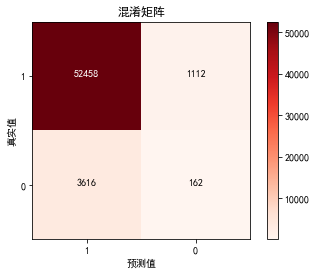

In [7]:
cnf_matrix = confusion_matrix(Y,Y_pred)
plot_confusion_matrix(cnf_matrix, [1, 0], cmap=plt.cm.Reds)



# 2、LeaveOneOut

In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
Y_L_pred = np.zeros(shape=[len(y),1])
for train_index,test_index in loo.split(x):
    train_X, test_X = x[train_index],x[test_index]
    train_Y, test_Y = Y[train_index],Y[test_index]
    clf.fit(train_X,train_Y)
    result_L=clf.predict(test_X)
    Y_L_pred[test_index,0] =  result_L

cnf_matrix_L = confusion_matrix(Y,Y_L_pred)
plot_confusion_matrix(cnf_matrix_L, [1, 0], cmap=plt.cm.Reds)
